# For 2-parameter MO-ASMO, visualize the results

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os, sys, time, glob

def read_parameter_csv(file_parameter_list):
    df_calibparam = pd.read_csv(file_parameter_list)
    for c in ['Upper', 'Lower', 'Factor', 'Value']:
        if c in df_calibparam.columns:
            if isinstance(df_calibparam.iloc[0][c], str):
                arr = []
                for i in range(len(df_calibparam)):
                    vi = df_calibparam.iloc[i][c]
                    if ',' in vi:
                        arr.append(np.array(vi.split(',')).astype(np.float64))
                    elif '[' in vi:
                        arr.append(np.array(vi.strip('[]').replace('\n', '').split(), dtype=np.float64))
                    else:
                        try:
                            arr.append(np.array([np.float64(vi)]))
                        except:
                            arr.append(np.array([-99999]))
                df_calibparam[c] = arr
    return df_calibparam


In [104]:
bnum = 40
path_paramset = f'/glade/work/guoqiang/CTSM_cases/MOASMO_CESM_2param/CAMELS{bnum}/param_sets'
path_submit = f'/glade/work/guoqiang/CTSM_cases/MOASMO_CESM_2param/CAMELS{bnum}/run_model'
path_archive = f'/glade/work/guoqiang/CTSM_cases/MOASMO_CESM_2param/CAMELS{bnum}/ctsm_outputs'

# bnum = 100
# path_paramset = f'/glade/work/guoqiang/CTSM_cases/MOASMO_CESM/CAMELS{bnum}/param_sets'
# path_submit = f'/glade/work/guoqiang/CTSM_cases/MOASMO_CESM/CAMELS{bnum}/run_model'
# path_archive = f'/glade/work/guoqiang/CTSM_cases/MOASMO_CESM/CAMELS{bnum}/ctsm_outputs'

In [105]:
sampling_method = 'glp'
num_init = 216 # initial number of samples
num_per_iter = 36 # number of selected pareto parameter sets for each iteration
num_iter = 9 # including the initial iteration

# Plot paramete distributions
Check if we have a good parameter space distribution

In [106]:
factors = np.zeros([num_init, 2])
values = np.zeros([num_init, 2])
for i in range(num_init):
    filei = f'{path_paramset}/paramset_iter0_trial{i}.csv'
    dfi = pd.read_csv(filei)
    # dfi = read_parameter_csv(filei)
    factors[i] = dfi['Factor'].values[:2]
    values[i] = dfi['Value'].values[:2]
    
names = dfi['Parameter'].values[:2]

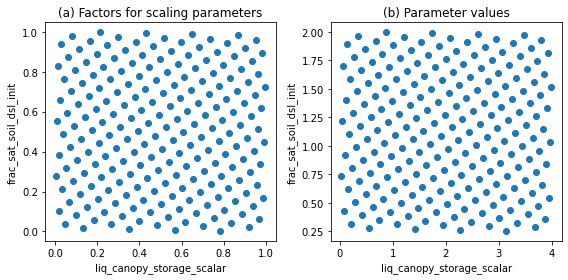

Value = LB + Factor * (UB - LB)


In [107]:
fig, axs = plt.subplots(1, 2, figsize=[8, 4])

axi=axs[0]
axi.scatter(factors[:,0], factors[:,1])
axi.set_xlabel(names[0])
axi.set_ylabel(names[1])
axi.set_title('(a) Factors for scaling parameters')

axi=axs[1]
axi.scatter(values[:,0], values[:,1])
axi.set_xlabel(names[0])
axi.set_ylabel(names[1])
axi.set_title('(b) Parameter values')

plt.tight_layout()
plt.show()

print('Value = LB + Factor * (UB - LB)')

# Plot objective function values in parameter space

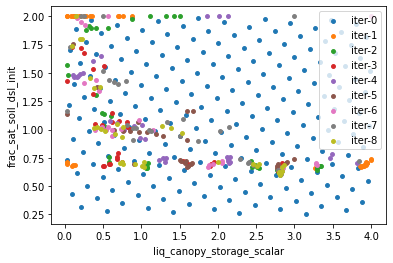

In [108]:
for i0 in range(num_iter):
    
    if i0 == 0:
        snum = num_init
    else:
        snum = num_per_iter

    values = np.zeros([snum, 2])
    for i in range(snum):
        filei = f'{path_paramset}/paramset_iter{i0}_trial{i}.csv'
        dfi = pd.read_csv(filei)
        values[i, :] = dfi['Value'].values
    
    names = dfi['Parameter'].values
    values = np.array(values)
    
    plt.scatter(values[:,0], values[:,1], 15, label=f'iter-{i0}')

    plt.xlabel(names[0])
    plt.ylabel(names[1])

plt.legend()
plt.show()

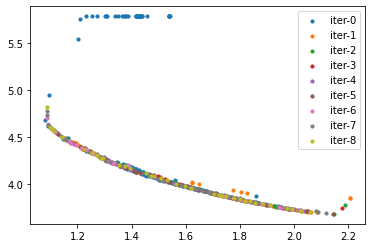

In [109]:

for i in range(num_iter):

    # read objective functions
    objfuncs = pd.read_csv(f'{path_archive}/iter{i}_all_metric.csv')
    # objfuncs = pd.read_csv('/glade/work/guoqiang/CTSM_cases/MOASMO_CESM/CAMELS100/ctsm_outputs/iter0_all_metric.csv')
    met1 = objfuncs['metric1'].values
    met2 = objfuncs['metric2'].values

    plt.scatter(met1, met2, 10, label=f'iter-{i}')
    
plt.legend()
plt.show()

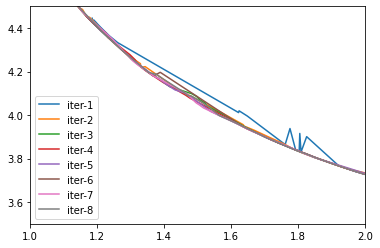

In [110]:

for i in range(1, num_iter):

    # read objective functions
    objfuncs = pd.read_csv(f'{path_archive}/iter{i}_all_metric.csv')
    # objfuncs = pd.read_csv('/glade/work/guoqiang/CTSM_cases/MOASMO_CESM/CAMELS100/ctsm_outputs/iter0_all_metric.csv')
    met1 = objfuncs['metric1'].values
    met2 = objfuncs['metric2'].values

    # plt.scatter(met1, met2, label=f'iter-{i}')
    x = met1
    y = met2

    sorted_indices = sorted(range(len(x)), key=lambda k: x[k])
    x_sorted = [x[i] for i in sorted_indices]
    y_sorted = [y[i] for i in sorted_indices]

    plt.plot(x_sorted, y_sorted, label=f'iter-{i}')


plt.xlim(1, 2)
plt.ylim(3.5, 4.5)
    
plt.legend()
plt.show()